In [3]:
import json

In [19]:
def get_friendly_name(param_name):
    return param_name.split(".")[-2]

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import defaultdict
import os

def plot_function(base_string, title, max_time=3, d_models=[256, 512, 1024, 2048], n_heads=[16]):

    
    fig, axs = plt.subplots(nrows=1, ncols=max_time, figsize=(8 * max_time, 8))
    for ax, time_step in zip(axs, range(max_time)):
        print(ax)
        per_layer_activations = defaultdict(list)

        for d_model in d_models:
            for n_head in n_heads:
                activation_json_file = os.path.join(base_string.format(d_model, n_head), f"batch_{time_step}.json")

               # Open the JSON file
                with open(activation_json_file) as f:
                    data = json.load(f) 
                    # print(data)
                    for param_name, val in data.items():
                        per_layer_activations[param_name].append(val)
        print(per_layer_activations)
    

        ax.set_title(title.format(time_step))
        cmap  = cm.get_cmap('viridis', len(per_layer_activations))
        for i, (param_name, scaled_versions) in enumerate(per_layer_activations.items()):
            if i == 0:
                continue
            ax.plot(d_models, scaled_versions, label=get_friendly_name(param_name), c=cmap(i))
        ax.set_xlabel("d_model")
        ax.set_ylabel("L1 Norm")
    axs[0].legend()

Axes(0.125,0.11;0.227941x0.77)
defaultdict(<class 'list'>, {'l1_norm/param/module.model.transformer.wte.weight': [909274.25, 1285953.375, 1818939.5], 'l1_norm/param/module.model.transformer.wpe.weight': [37045.1328125, 52308.6875, 74022.59375], 'l1_norm/param/module.model.transformer.blocks.0.ln_1.weight': [256.0, 512.0, 1024.0], 'l1_norm/param/module.model.transformer.blocks.0.attn.Wqkv.weight': [13862.9130859375, 39211.7734375, 110909.0078125], 'l1_norm/param/module.model.transformer.blocks.0.attn.out_proj.weight': [2316.59326171875, 6540.6181640625, 18506.419921875], 'l1_norm/param/module.model.transformer.blocks.0.ln_2.weight': [256.0, 512.0, 1024.0], 'l1_norm/param/module.model.transformer.blocks.0.mlp.mlp_up.weight': [18479.41796875, 52275.46484375, 147842.5], 'l1_norm/param/module.model.transformer.blocks.0.mlp.mlp_down.weight': [4614.37890625, 13055.8671875, 36978.1015625], 'l1_norm/param/module.model.transformer.blocks.1.ln_1.weight': [256.0, 512.0, 1024.0], 'l1_norm/param/mod

/tmp/ipykernel_30290/3811430747.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap  = cm.get_cmap('viridis', len(per_layer_activations))


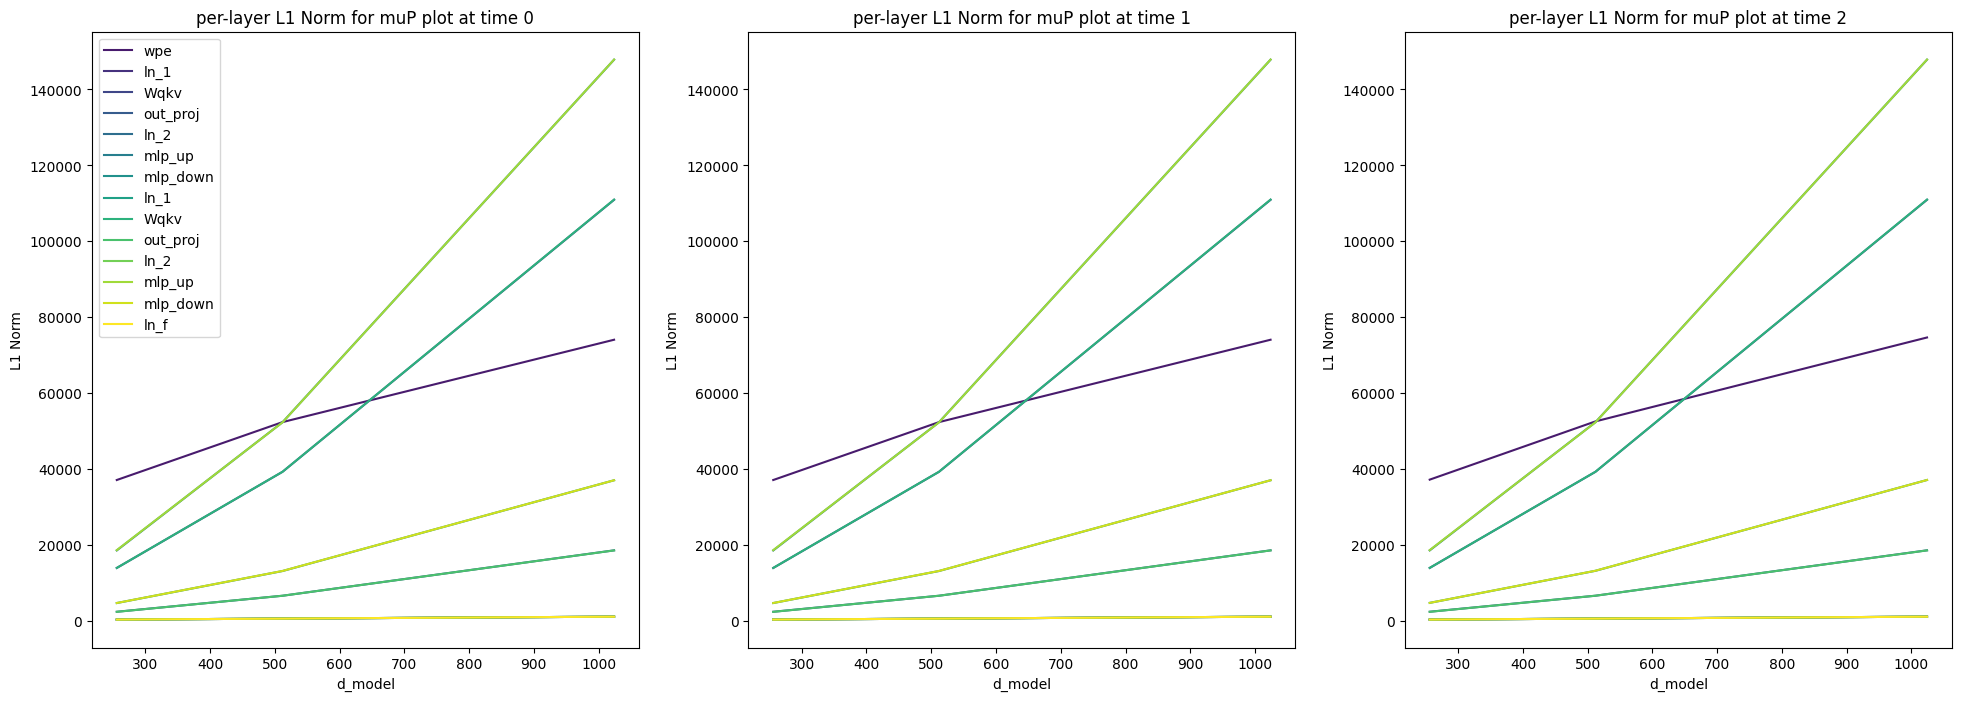

In [45]:
plot_function("/root/small_2_layers_mup_scaled_d_model_{}_n_head_{}", "per-layer L1 Norm for muP plot at time {}")

Axes(0.125,0.11;0.227941x0.77)
defaultdict(<class 'list'>, {'l1_norm/param/module.model.transformer.wte.weight': [909274.25, 1285953.375, 1818939.5], 'l1_norm/param/module.model.transformer.wpe.weight': [37045.1328125, 52308.6875, 74022.59375], 'l1_norm/param/module.model.transformer.blocks.0.ln_1.weight': [256.0, 512.0, 1024.0], 'l1_norm/param/module.model.transformer.blocks.0.attn.Wqkv.weight': [13862.9130859375, 39211.7734375, 110909.0078125], 'l1_norm/param/module.model.transformer.blocks.0.attn.out_proj.weight': [2316.59326171875, 6540.6181640625, 18506.419921875], 'l1_norm/param/module.model.transformer.blocks.0.ln_2.weight': [256.0, 512.0, 1024.0], 'l1_norm/param/module.model.transformer.blocks.0.mlp.mlp_up.weight': [18479.41796875, 52275.46484375, 147842.5], 'l1_norm/param/module.model.transformer.blocks.0.mlp.mlp_down.weight': [4614.37890625, 13055.8671875, 36978.1015625], 'l1_norm/param/module.model.transformer.blocks.1.ln_1.weight': [256.0, 512.0, 1024.0], 'l1_norm/param/mod

/tmp/ipykernel_30290/3811430747.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap  = cm.get_cmap('viridis', len(per_layer_activations))


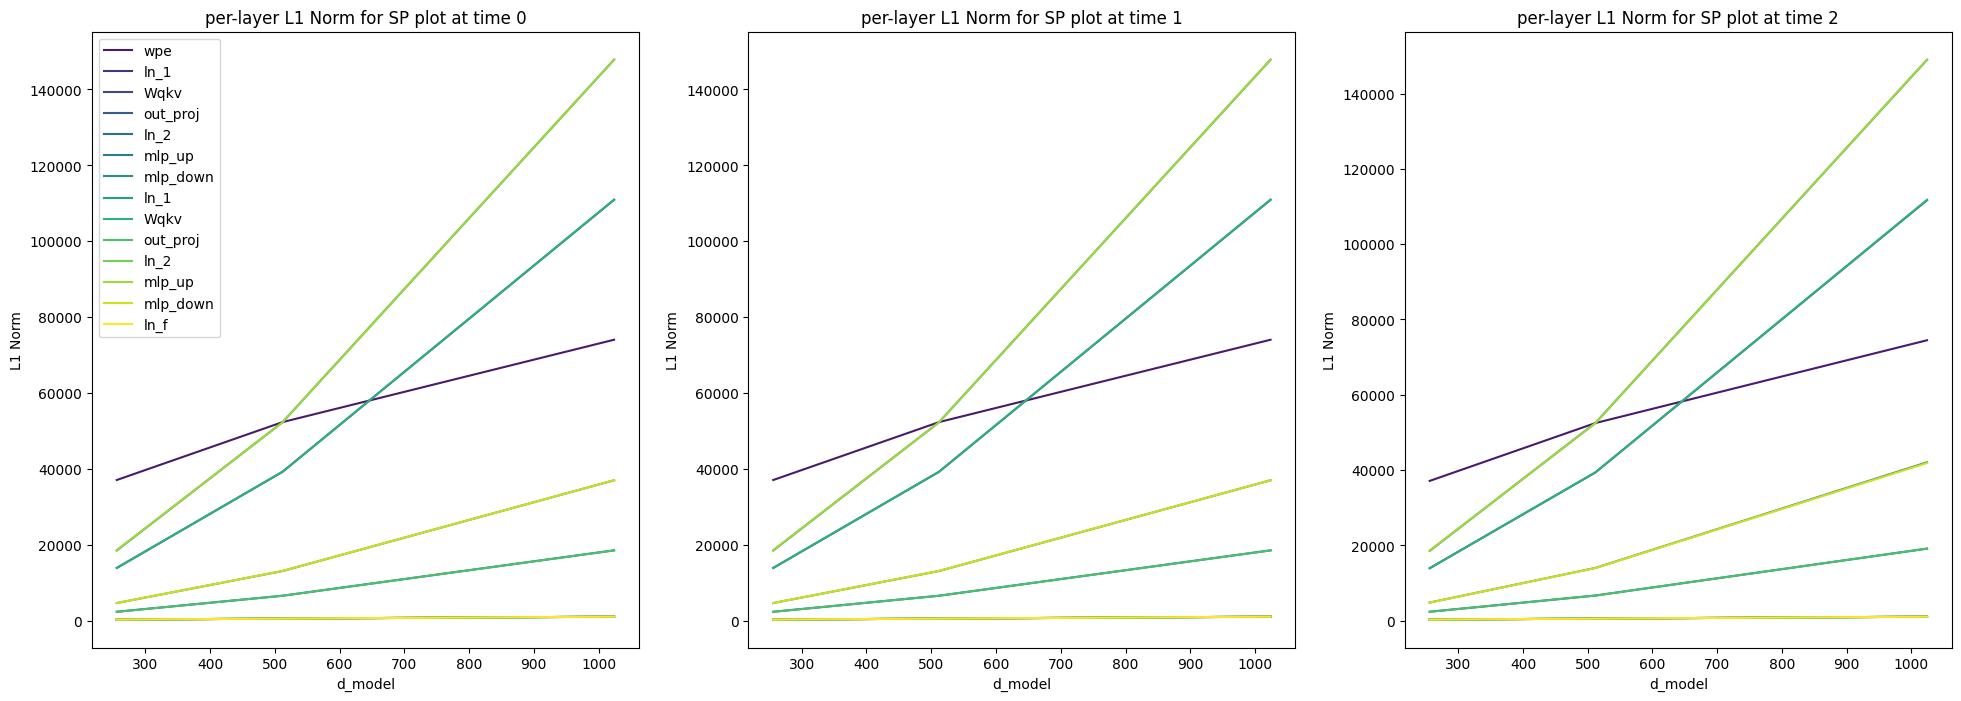

In [46]:
plot_function("/root/small_2_layers_no_mup_scaled_d_model_{}_n_head_{}", "per-layer L1 Norm for SP plot at time {}")